<a href="https://colab.research.google.com/github/ritikakhandelwal-17/Fuel-Cell-EV-Voltage-Prediction/blob/main/BTP_FCEV_Voltage_Prediction_Cycle2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np


from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [17]:
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
data = pd.read_csv('/content/Cycle2 Data BTP - data_cycle2.csv')

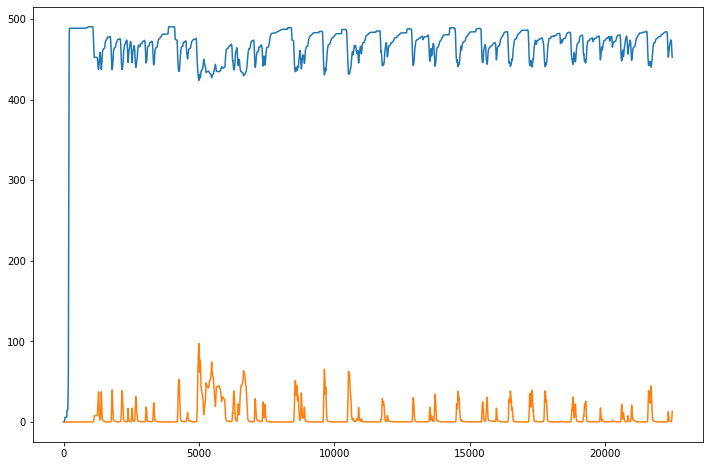

In [19]:
plt.figure(figsize=(12,8))
plt.plot(data['Voltage'])
plt.plot(data['Current'])
plt.show()

In [20]:
data

,Time,Voltage,Current
0,5.310000e-30,2.600000e-24,3.950000e-33
1,1.960000e-10,9.600000e-05,1.460000e-13
2,5.310000e-10,2.598223e-04,7.910000e-13
3,1.520000e-09,7.428029e-04,5.570000e-12
4,2.750000e-09,1.346306e-03,1.400000e-11
...,...,...,...
22478,9.996934e+02,4.534165e+02,1.179222e+01
22479,9.997651e+02,4.530892e+02,1.228517e+01
22480,9.998545e+02,4.527698e+02,1.277799e+01
22481,9.999439e+02,4.525409e+02,1.313626e+01


In [21]:
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [22]:
data = data.drop('Time',axis=1)
X = data.drop("Voltage",axis=1)
y=data['Voltage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
data

,Voltage,Current
0,2.600000e-24,3.950000e-33
1,9.600000e-05,1.460000e-13
2,2.598223e-04,7.910000e-13
3,7.428029e-04,5.570000e-12
4,1.346306e-03,1.400000e-11
...,...,...
22478,4.534165e+02,1.179222e+01
22479,4.530892e+02,1.228517e+01
22480,4.527698e+02,1.277799e+01
22481,4.525409e+02,1.313626e+01


In [24]:
models = []
models_mae = []
models_mse = []
models_rmse = []
models_r_squared = []

In [25]:
#Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
models.append('Linear Regression')
models_mae.append(mae)
models_mse.append(mse)
models_rmse.append(rmse)
models_r_squared.append(r_squared)

MAE: 11.409346359296496
MSE: 1461.0673874698998
RMSE: 38.22391120058098
R2 Score: 0.08373394916780552


In [26]:
#SVM
svr = SVR(C=10)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

models.append('SVR')
models_mae.append(mae)
models_mse.append(mse)
models_rmse.append(rmse)
models_r_squared.append(r_squared)

MAE: 6.138218408950567
MSE: 1444.430835408314
RMSE: 38.005668464168785
R2 Score: 0.09416708044406408


In [27]:
#Random Forest
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

models.append('Random Forest')
models_mae.append(mae)
models_mse.append(mse)
models_rmse.append(rmse)
models_r_squared.append(r_squared)

MAE: 1.6985937835097733
MSE: 64.69466538500993
RMSE: 8.04329940913615
R2 Score: 0.9594286163180448


In [28]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

models.append('XGBRegressor')
models_mae.append(mae)
models_mse.append(mse)
models_rmse.append(rmse)
models_r_squared.append(r_squared)

[19:34:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 1.5962311604020099
MSE: 32.85323212343329
RMSE: 5.731773907215225
R2 Score: 0.9793970479986285


In [15]:
import keras_tuner
from tensorflow import keras

def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Choice('units', [25,50,100,150,200,250,300]),
      activation='relu'))
  model.add(keras.layers.Dense(
      hp.Choice('units', [25,50,100,150,200,250,300]),
      activation='relu'))
  model.add(keras.layers.Dense(
      hp.Choice('units', [25,50,100,150,200,250,300]),
      activation='relu'))
  model.add(keras.layers.Dense(
      hp.Choice('units', [25,50,100,150,200,250,300]),
      activation='relu'))
  model.add(keras.layers.Dense(1, activation='linear'))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10)

tuner.search(X_train, y_train, epochs=500, validation_split=0.2)
best_model = tuner.get_best_models()[0]

predictions = best_model.predict(X_test)
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

models.append('ANN')
models_mae.append(mae)
models_mse.append(mse)
models_rmse.append(rmse)
models_r_squared.append(r_squared)



Trial 7 Complete [00h 11m 27s]
val_loss: 75.33499908447266

Best val_loss So Far: 74.29995727539062
Total elapsed time: 01h 49m 18s
176/176 [==============================] - 0s 1ms/step
MAE: 1.9248235793751616
MSE: 24.00831272777705
RMSE: 4.899827826340131
R2 Score: 0.984943882753883


In [33]:
predictions = best_model.predict(X_test)
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

models.append('ANN')
models_mae.append(mae)
models_mse.append(mse)
models_rmse.append(rmse)
models_r_squared.append(r_squared)

176/176 [==============================] - 1s 3ms/step
MAE: 1.9248235793751616
MSE: 24.00831272777705
RMSE: 4.899827826340131
R2 Score: 0.984943882753883


In [38]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                50        
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 25)                650       
                                                                 
 dense_3 (Dense)             (None, 25)                650       
                                                                 
 dense_4 (Dense)             (None, 1)                 26        
                                                                 
Total params: 2,026
Trainable params: 2,026
Non-trainable params: 0
_________________________________________________________________


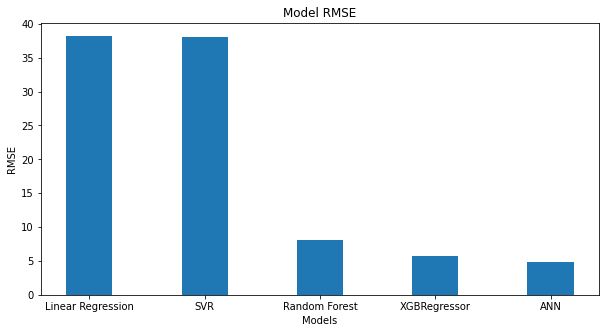

In [34]:
 
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, models_rmse,
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.title("Model RMSE")
plt.show()

In [35]:
for i in range (0, 5):
  print('The RMSE for '+models[i]+' is '+ str(models_rmse[i]))
  print('\n')

The RMSE for Linear Regression is 38.22391120058098


The RMSE for SVR is 38.005668464168785


The RMSE for Random Forest is 8.04329940913615


The RMSE for XGBRegressor is 5.731773907215225


The RMSE for ANN is 4.899827826340131




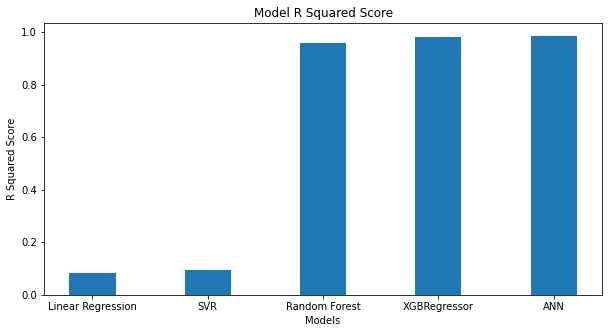

In [36]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, models_r_squared,
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("R Squared Score")
plt.title("Model R Squared Score")
plt.show()

In [37]:
for i in range (0, 5):
  print('The R-Squared Score for '+models[i]+' is '+ str(models_r_squared[i]))
  print('\n')


The R-Squared Score for Linear Regression is 0.08373394916780552


The R-Squared Score for SVR is 0.09416708044406408


The R-Squared Score for Random Forest is 0.9594286163180448


The R-Squared Score for XGBRegressor is 0.9793970479986285


The R-Squared Score for ANN is 0.984943882753883


